# Correlación vs clasificación

Las variables pueden tener asociaciones no lineales, en cuyo caso la valiosa herramienta de análisis de correlación puede ser inútil. 
Dos variables predictoras fuertemente correlacionadas sigieren que ambas presentan la misma información y son candidatas a:
Eliminar alguna de ambas
Realizar una fusión manual (Ej: BMI)
Realizar una fusión mediante alguna herramienta matemática como (PCA).
La correlación entre predictora y target puede ser una buena noticia, pero la no correlación no indica que la variable no sea predictora, pueden existir fuertes asociaciones no lineales. 


         V1        V2  Target
0 -3.975937 -4.407473       1
1  6.661259 -5.457096       0
2 -6.607483  5.184634       0
3  6.076007 -4.978688       0
4 -5.756351  3.577746       0


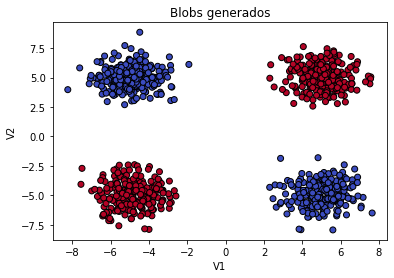

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # vecinos más cercanos para clasificación
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from sklearn.metrics import classification_report
sys.path.append('../Code')


centers = [[-5, 5], [5, 5], [-5, -5], [5, -5]]  # Cuadrantes: NW, NE, SW, SE

# Generamos los datos con make_blobs
X, y = make_blobs(
    n_samples=1000,        # Número de muestras
    centers=centers,       # Centros en los 4 cuadrantes
    n_features=2,          # Dos variables (dimensiones)
    cluster_std=1.0,       # Dispersión de cada cluster
    random_state=42
)

# Alternamos la asignación de clases: 0 para los blobs en (NW, SE) y 1 para (NE, SW)
y = np.where((y == 0) | (y == 3), 0, 1)

# Convertimos los datos en un DataFrame
df = pd.DataFrame(X, columns=['V1', 'V2'])
df['Target'] = y

# Visualizamos las primeras filas del DataFrame
print(df.head())

# Visualizamos los blobs
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Blobs generados')
plt.show()


Nadie tiene correlación (de Pearson) con nadie, sin embargo la capacidad de clasificación es total. 

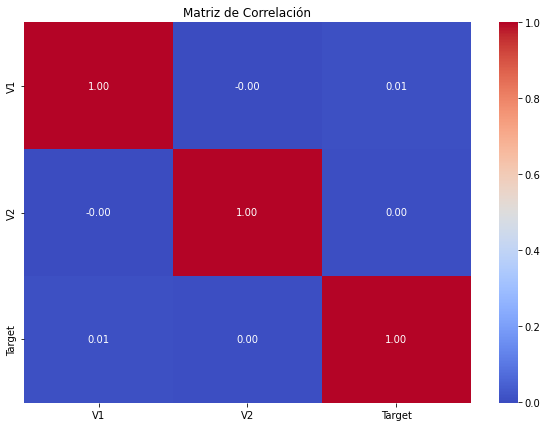

In [6]:
fig, ax = plt.subplots(figsize=(10,7))
mat = df[["V1", "V2", 'Target']].select_dtypes(include=['int', 'float']).corr( method='pearson')
sns.heatmap(mat, annot=True, cmap='coolwarm', fmt=".2f",  ax=ax)
plt.title('Matriz de Correlación')
plt.show()

In [7]:
X = df.drop(columns='Target')
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
ss = StandardScaler()
ss.fit(X_train) # entrenamos los valores quitandole la variable clase
X_train.loc[:,X_train.columns] = ss.transform(X_train)
X_test.loc[:,X_test.columns] = ss.transform(X_test)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train) # Entrenamos el clasificador
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



¿Existen otras correlaciones ademas de la correlación de Pearson? Si, las correlaciones de Kendall y Spearman 

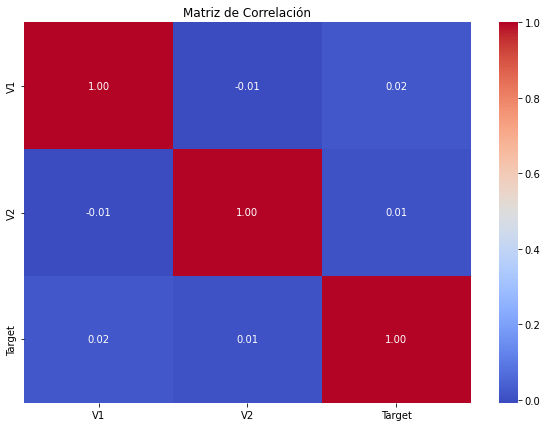

In [9]:
fig, ax = plt.subplots(figsize=(10,7))
mat = df[["V1", "V2", 'Target']].select_dtypes(include=['int', 'float']).corr(method='spearman')
sns.heatmap(mat, annot=True, cmap='coolwarm', fmt=".2f",  ax=ax)
plt.title('Matriz de Correlación')
plt.show()

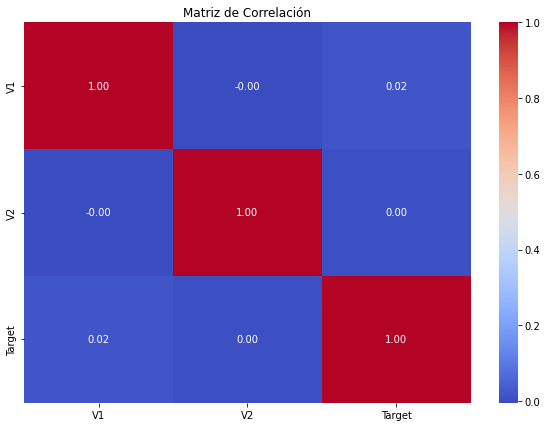

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
mat = df[["V1", "V2", 'Target']].select_dtypes(include=['int', 'float']).corr(method='kendall')
sns.heatmap(mat, annot=True, cmap='coolwarm', fmt=".2f",  ax=ax)
plt.title('Matriz de Correlación')
plt.show()